## 1. Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   
from sklearn.linear_model import LinearRegression, LogisticRegression   

## 2. Linear Regression

In [21]:
def _add_bias_term(X: np.ndarray) -> np.ndarray:
    n = X.shape[0]
    return np.hstack([np.ones((n, 1)), X])
    

# using matrix multiplication
class CustomLinearRegression():
    def __init__(self) -> None:
        self.W = None
        
        
    def fit(self, X, Y) -> None:
        """ 
        y = X * W    
        W = inv(X_t * X) * X_t * Y  
        """
            
        # Add bias
        X = _add_bias_term(X)
        self.W = np.linalg.inv(X.T @ X) @ X.T @ Y
        return None
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        X = _add_bias_term(X)
        return X @ self.W 
    
    
    
    
class CustomLinearRegressionGD():
    
    def __init__(self, L2_regul: float = 0.1):
        self.L2_regul = L2_regul
        self.W = None
        
        
    def fit(self, X: np.ndarray, Y: np.ndarray, lr: float = 0.01, num_iters: int = 1000) -> None:
        
        # Add checks
        if (len(X) != len(Y)) or len(X) ==0:
            raise ValueError("The number of samples in X and Y should be the same.")
        
        if (num_iters<=0) or (lr<=0):
            raise ValueError("Number of iterations and learning rate should be positive.")
        
        # Add bias
        X = _add_bias_term(X)
        
        # Gradient decsent
        self.W = np.zeros(X.shape[1])
        for i in range(num_iters):
            y_pred = np.dot(X, self.W)
            
            # cost
            loss = np.sum((y_pred - y)**2) + (self.L2_regul * np.sum(self.W ** 2))
            
            # Calculate gradient
            gradient = 2 * np.dot(X.T, y_pred-y) + 2 * self.L2_regul * self.W
            
            # Update weights
            self.W -= lr*gradient 
                        
        
        return None
        
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.dot(_add_bias_term(X), self.W)

    

In [6]:
# Using the non gradient descent algorithm
# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

# Fit linear regression model
lr = CustomLinearRegression()
lr.fit(X, y)
print(lr.W) # [3. 1. 2.]

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print(y_pred)  # Output: [43. 55.]

[3. 1. 2.]
[35. 44.]


In [25]:

X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = CustomLinearRegressionGD()
lr.fit(X, y, lr=0.01, num_iters=10000)
print(lr.W)  # Output: [ 1.99964292  0.65345474 ]
y_pred = lr.predict(X)
print(y_pred) 

[1.99964292 0.65345474]
[2.65309766 3.3065524  3.96000714 4.61346188 5.26691662]


### 3. Logistic Regresison

In [ ]:
class CustomLogisticRegression():
    
    
    def __init__(self) -> None:
        
        return None
    
    def fit() -> None:
        
        return None
        
        
    def predict(self, X) -> np.ndarray:
        return None
    

## 4. K-means clustering

In [29]:
np.random.choice?

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a unif

In [30]:
np.linalg.norm?


Signature: np.linalg.norm(x, ord=None, axis=None, keepdims=False)
Docstring:
Matrix or vector norm.

This function is able to return one of eight different matrix norms,
or one of an infinite number of vector norms (described below), depending
on the value of the ``ord`` parameter.

Parameters
----------
x : array_like
    Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
    is None. If both `axis` and `ord` are None, the 2-norm of
    ``x.ravel`` will be returned.
ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
    Order of the norm (see table under ``Notes``). inf means numpy's
    `inf` object. The default is None.
axis : {None, int, 2-tuple of ints}, optional.
    If `axis` is an integer, it specifies the axis of `x` along which to
    compute the vector norms.  If `axis` is a 2-tuple, it specifies the
    axes that hold 2-D matrices, and the matrix norms of these matrices
    are computed.  If `axis` is None then either a vector norm (when `x`
    is 1

In [31]:
np.where?

Docstring:
where(condition, [x, y], /)

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes
-----
If all the arrays are 1-D, `where` is equivalent to::

    [xv if c else yv
     for c, xv, yv in zip(condition, x, y)]

Example

In [32]:
np.array_equal?

Signature: np.array_equal(a1, a2, equal_nan=False)
Docstring:
True if two arrays have the same shape and elements, False otherwise.

Parameters
----------
a1, a2 : array_like
    Input arrays.
equal_nan : bool
    Whether to compare NaN's as equal. If the dtype of a1 and a2 is
    complex, values will be considered equal if either the real or the
    imaginary component of a given value is ``nan``.

    .. versionadded:: 1.19.0

Returns
-------
b : bool
    Returns True if the arrays are equal.

See Also
--------
allclose: Returns True if two arrays are element-wise equal within a
          tolerance.
array_equiv: Returns True if input arrays are shape consistent and all
             elements equal.

Examples
--------
>>> np.array_equal([1, 2], [1, 2])
True
>>> np.array_equal(np.array([1, 2]), np.array([1, 2]))
True
>>> np.array_equal([1, 2], [1, 2, 3])
False
>>> np.array_equal([1, 2], [1, 4])
False
>>> a = np.array([1, np.nan])
>>> np.array_equal(a, a)
False
>>> np.array_equal(a, a, e

In [55]:
np.newaxis?

Type:        NoneType
String form: None
Docstring:   <no docstring>

In [59]:
np.concatenate?

Docstring:
concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind")

Join a sequence of arrays along an existing axis.

Parameters
----------
a1, a2, ... : sequence of array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int, optional
    The axis along which the arrays will be joined.  If axis is None,
    arrays are flattened before use.  Default is 0.
out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what concatenate would have returned if no
    out argument were specified.
dtype : str or dtype
    If provided, the destination array will have this dtype. Cannot be
    provided together with `out`.

    .. versionadded:: 1.20.0

casting : {'no', 'equiv', 'safe', 'same_kind', 'unsafe'}, optional
    Controls what kind of data casting may occur. Defaults to 'same_kind'.

    .. versionadded:: 1.20.0

Returns

In [53]:
class KMeans:
    
    def __init__(self, k, max_iterations=100, tol = 1e-4):
        self.k = k
        self.max_iterations = max_iterations
        self.tol = tol
        self.cluster_assignments = np.nan
        self.centroids = np.nan
        
        
    def fit(self, X) -> None:
        
        if not isinstance(X, np.ndarray):
            X = np.asarray(X)
        
        # Choose centroids
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        for iter in range(self.max_iterations):
            # Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            cluster_assignments = np.argmin(distances, axis=1)
                
            # Update centroids
            new_centroids = np.array([np.mean(X[np.where(np.array(cluster_assignments) ==j)], axis=0) for j in range(self.k)])                
                
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            
            self.centroids = new_centroids
            
        self.cluster_assignments = cluster_assignments
            
        return None   
         
        
        
    def predict(self, X):
        # Assign clusters
        cluster_assignments = []
        for i in range(len(X)):
            distances = np.linalg.norm(X[i] - self.centroids, axis=1)
            cluster_assignments.append(np.argmin(distances))
            
        return cluster_assignments

In [54]:
num_samples = 50
x1 = np.random.randn(num_samples,2) + 5
x2 = np.random.randn(num_samples,2) - 5
X = np.concatenate([x1,x2], axis=0)

# Initialize the KMeans object with k=3
kmeans = KMeans(k=2)

# Fit the k-means model to the dataset
kmeans.fit(X)

# Get the cluster assignments for the input dataset
cluster_assignments = kmeans.predict(X)

# Print the cluster assignments
print(cluster_assignments)

# Print the learned centroids
print(kmeans.centroids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-4.92465394 -5.00431652]
 [ 4.79985465  4.72403842]]


In [67]:
centroids = X[np.random.choice(X.shape[0], 2, replace=False)]
X[:2, np.newaxis] - centroids

array([[[ 8.08594525,  9.22704964],
        [ 1.43211325, -1.72891002]],

       [[ 7.70136893,  9.41146569],
        [ 1.04753693, -1.54449397]]])

In [72]:
X[:, np.newaxis].shape

(100, 1, 2)

In [73]:
X.shape

(100, 2)

In [66]:
centroids.shape

(2, 2)

In [64]:
np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

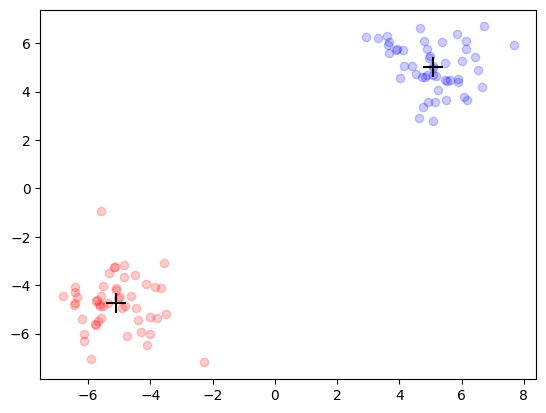

In [48]:
from matplotlib import pyplot as plt
# Plot the data points with different colors based on their cluster assignments
colors = ['r', 'b']
for i in range(kmeans.k):
    plt.scatter(X[np.where(np.array(cluster_assignments) == i)][:,0], 
                X[np.where(np.array(cluster_assignments) == i)][:,1], 
                color=colors[i], alpha = 0.2)

# Plot the centroids as black circles
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color='black', marker='+', s=200)

# Show the plot
plt.show()

## 4. Pipelining

In [75]:
import sklearn
dir(sklearn.svm)

['LinearSVC',
 'LinearSVR',
 'NuSVC',
 'NuSVR',
 'OneClassSVM',
 'SVC',
 'SVR',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bounds',
 '_classes',
 '_liblinear',
 '_libsvm',
 '_libsvm_sparse',
 'l1_min_c']

In [76]:
dir(sklearn.model_selection)

['BaseCrossValidator',
 'BaseShuffleSplit',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold',
 'LearningCurveDisplay',
 'LeaveOneGroupOut',
 'LeaveOneOut',
 'LeavePGroupsOut',
 'LeavePOut',
 'ParameterGrid',
 'ParameterSampler',
 'PredefinedSplit',
 'RandomizedSearchCV',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'ShuffleSplit',
 'StratifiedGroupKFold',
 'StratifiedKFold',
 'StratifiedShuffleSplit',
 'TimeSeriesSplit',
 'ValidationCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_plot',
 '_search',
 '_split',
 '_validation',
 'check_cv',
 'cross_val_predict',
 'cross_val_score',
 'cross_validate',
 'learning_curve',
 'permutation_test_score',
 'train_test_split',
 'typing',
 'validation_curve']

In [77]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline


In [78]:
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

In [79]:
X, y = make_classification(random_state=42)

In [80]:
X.shape

(100, 20)

In [81]:
X[:5, :]

array([[-2.02514259,  0.0291022 , -0.47494531, -0.11473644,  0.50498728,
         0.08896214,  0.40498171, -0.65332923,  0.18645431, -0.66178646,
        -0.07133524,  2.14394409,  1.76545424,  0.85243333,  0.63391902,
         0.08714206, -0.79252074, -0.33450124,  0.86575519, -1.20029641],
       [ 1.61371127,  0.65992405, -0.15005559, -1.22760782,  0.59740007,
         0.86561977,  0.01557905,  0.12557645,  0.4535343 , -0.24415664,
        -1.15806823,  0.32135722, -0.17307182,  0.96408717,  0.42192075,
         0.96335953,  1.18947049,  1.37570681,  0.70117274, -0.2975635 ],
       [ 0.16645221,  0.95057302,  1.42050425, -0.53099696, -0.62314053,
        -2.25553963,  0.47141556, -0.57074629,  0.49245126,  0.28916864,
        -0.27062383, -1.12272202, -0.83235557,  2.45530014,  0.38240975,
        -1.69200458, -0.63773998,  1.18901653, -0.55547712, -0.63738713],
       [ 0.69822331, -0.32066954,  1.7359638 , -0.53523521,  1.31739407,
        -1.14658127, -0.48388583,  0.19791078,  

In [83]:
y

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [86]:
(X_test.shape, X_train.shape)

((25, 20), (75, 20))

In [88]:
pipe = Pipeline([("scaler", StandardScaler()),("svc",  SVC())])

In [90]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.92

In [91]:
pipe.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)

0.92

In [92]:
from sklearn.pipeline import make_pipeline

In [93]:
make_pipeline?

Signature: make_pipeline(*steps, memory=None, verbose=False)
Docstring:
Construct a :class:`Pipeline` from the given estimators.

This is a shorthand for the :class:`Pipeline` constructor; it does not
require, and does not permit, naming the estimators. Instead, their names
will be set to the lowercase of their types automatically.

Parameters
----------
*steps : list of Estimator objects
    List of the scikit-learn estimators that are chained together.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache the fitted transformers of the pipeline. The last step
    will never be cached, even if it is a transformer. By default, no
    caching is performed. If a string is given, it is the path to the
    caching directory. Enabling caching triggers a clone of the transformers
    before fitting. Therefore, the transformer instance given to the
    pipeline cannot be inspected directly. Use the attribute ``named_steps``
    or ``steps`` to inspect estima

## Scratch

In [27]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
result = np.dot(A, B)
result

array([[19, 22],
       [43, 50]])

In [28]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
result = A @ B
result

array([[19, 22],
       [43, 50]])